420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Optimisation des hyperparamètres 101](static/16-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la recherche des meilleurs hyperparamètres appliqués à l'ensemble des algorithmes vus en cours jusqu'à maintenant. Le jeu de données utilisée sera **Titanic**

In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

## Exercice 1 - Chargement et exploration sommaire des données

In [34]:
import pandas as pd
#titanic = pd.read_csv('../../data/titanic_train.csv', index_col='PassengerId')
titanic = pd.read_csv('/home/hadoop/Git_Ia/CegepSteFoy_IA/05_MachineLearning/2023-01-18/420-A52-SF-gr-10084-main/data/titanic_train.csv')
#titanic = pd.read_csv('')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
import seaborn as sns

# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, })
sns.set(rc={'figure.figsize':(11.7,8.27)})

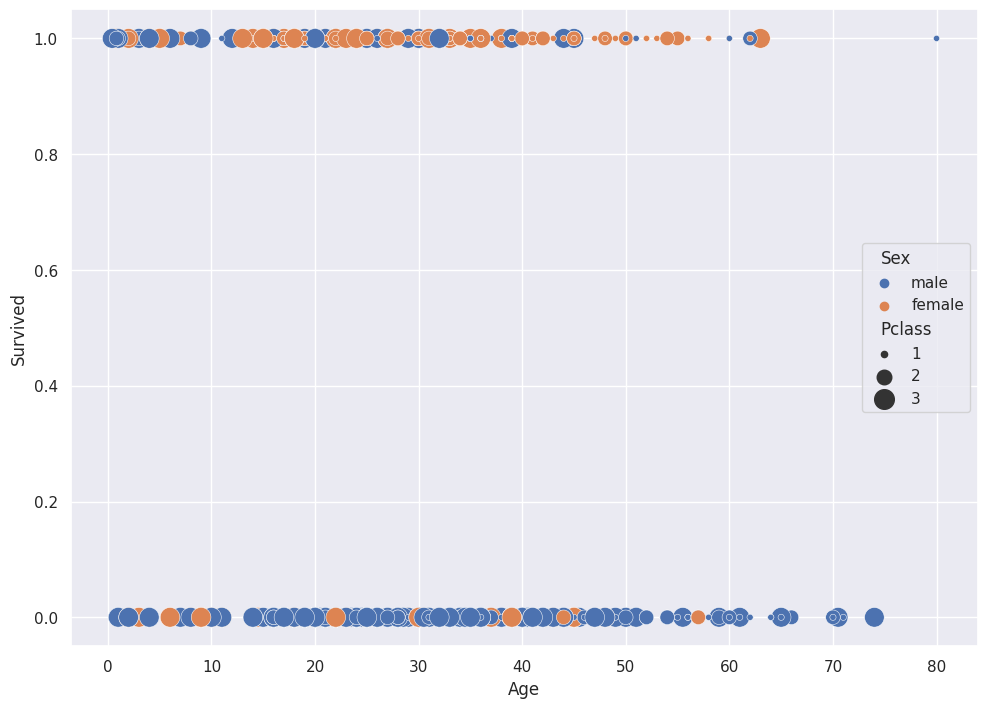

In [5]:
_ = sns.scatterplot(x='Age', y='Survived', hue='Sex', size='Pclass', sizes=(20, 200), data=titanic)

In [36]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Conversion des variables `embarked` et `sex`

In [27]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
lstColxExcl = ['PassengerId',  'Name', 'Cabin', 'Ticket']
dfTitanicNum = titanic.drop(lstColxExcl, axis =1)
dfTitanicNum = dfTitanicNum.fillna(dfTitanicNum['Age'].mean())
col_sex_num = pd.get_dummies(titanic['Sex'], drop_first=True, columns=['Sex'])
#print(col_sex_num.head())
dfTitanicNum = pd.get_dummies(dfTitanicNum, drop_first=True)

dfTitanicNum.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [44]:
dfTitanicNum.isnull().sum()
#dfTitanicNum.head()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### Vérification de la proportion des classes positives (Survided) et négatives (Died) 

In [45]:
dfTitanicNum.head()
## proportion
dfTitanicNum['Survived'].sum()/len(dfTitanicNum['Survived'])

0.3838383838383838

In [46]:
## préparation dataset
dfXNum = dfTitanicNum.drop(columns=['Survived'])
dfYNum = dfTitanicNum['Survived']

In [33]:
dfXNum.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


#### Imputation des valeurs manquantes

Les valeurs manquantes seront imputées pour l'exercice pour simplififer

#### Préparation du jeu de test

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
def getScaledDf(pDfX, pScaler = StandardScaler()):
    return pScaler.fit_transform(pDfX)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(getScaledDf( dfXNum), dfYNum, train_size=0.7
, random_state=2023
, shuffle=True
, stratify = dfYNum)

## Exercice 2 - Recherche sur grille

### 2-1 - Régression logistique

[class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [38]:
#model = LogisticRegression(penalty='l2', C=1.0, l1_ratio=[0, 0.5, 1.0], solver='saga')
#model = LogisticRegression(penalty='elasticnet', C=1.0, l1_ratio=[0, 0.5, 1.0], solver='saga')
model = LogisticRegression( solver='saga')

In [39]:
param_grid = {'C' :[0, 0.01, 0.1, 0.4,  0.5, 0.55,  0.6, 1]
, 'l1_ratio': [0, 0.5, 1]
#, 'penalty': ['l1', 'l2', 'elasticnet', 'none']
#, 'penalty': ['l1', 'l2', 'elasticnet']
, 'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hado

Best params:  {'C': 0.55, 'l1_ratio': 0, 'penalty': 'l1'}
Best score:  0.8610722738907229


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hadoop/.local/lib/python3.11/site-packages/sklearn/model_selection/_validatio

In [ ]:
## 1 définir une grille "C", "L1_ratio" dict paython
## 2 LogisticRegression(penalty) 
## 3 GridSearchCV 5 plis AUC
## 4 fit

In [50]:
from sklearn.metrics import  roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(pYVal, pYValProba, pLabel):
    
    #fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_label)
    fpr, tpr, thresholds = roc_curve(pYVal, pYValProba)
    fig = plt.figure(4, figsize=(6,6))
    plt.plot([0,1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=pLabel)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    #plot_roc_curve(fpr, tpr)
    plt.show()

In [41]:
def plot_multi_roc_curve(pDictResults):
    print ("--[plot_multi_roc_curve]--")
    
    fig = plt.figure(4, figsize=(7,7))
       
    
    for key in pDictResults.keys():
        print("[key]: ", key)
        innerDict = pDictResults.get(key)
        y_actual = innerDict.get('y_actual')
        y_pred = innerDict.get('y_pred')
        roc_auc = innerDict.get('roc_auc_score')

        fpr, tpr, thresholds = roc_curve(y_actual, y_pred)
        

        plt.plot(fpr, tpr,label = key + " - [roc_auc]: "+str(round(roc_auc, 3)))
        #plot_roc_curve(fpr, tpr, label=key)


    plt.plot([0,1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    
    plt.show()    


In [49]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc

In [43]:
## precision recall curve
def plot_multi_precision_recall(pDictResults):
    print ("--[plot_multi_precision_recall--")
    
    fig = plt.figure(4, figsize=(7,7))
       
    
    for key in pDictResults.keys():
        print("[key]: ", key)
        innerDict = pDictResults.get(key)
        y_actual = innerDict.get('y_actual')
        y_pred = innerDict.get('y_pred')
        #roc_auc = innerDict.get('roc_auc_score')

        precision, recall, thresholds = precision_recall_curve(y_actual, y_pred)
        #auc_precision_recall = auc(recall, precision)
        avg_precision = average_precision_score(y_actual, y_pred)
        

        #plt.plot(recall, precision,label = key + " - [auc]: "+str(round(auc_precision_recall, 3)))
        plt.plot(recall, precision,label = key + " - [avg_precision]: "+str(round(avg_precision, 3)))
        #plot_roc_curve(fpr, tpr, label=key)


    #plt.plot([1,1], [1, 0], 'k--')
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    #pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='lower left')
    
    plt.show() 


    

In [51]:
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier

-------------
[model]:  DummyClassifier()
[params]:  {'strategy': ['most_frequent', 'prior']}
RandomizedSearchCV(cv=5, estimator=DummyClassifier(), n_iter=48,
                   param_distributions={'strategy': ['most_frequent', 'prior']},
                   random_state=2023, scoring='precision')
Best params:  {'strategy': 'most_frequent'}
Best score: [precision]: 0.0
AUC = 0.5
len(dictResults):  1


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=48. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0

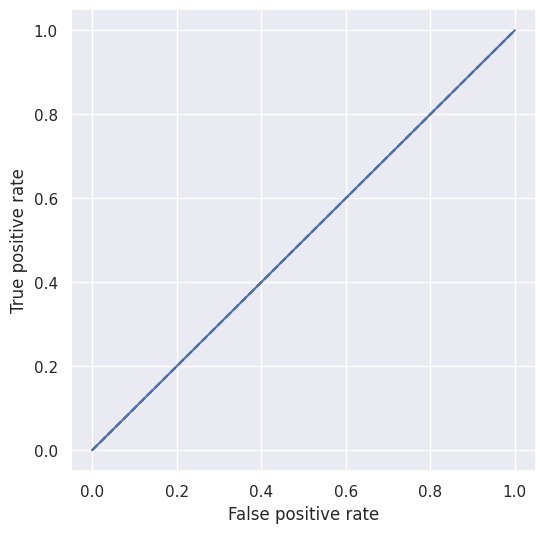

-------------
[model]:  LogisticRegression(max_iter=194, random_state=2023, solver='saga')
[params]:  {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f96db89fa90>, 'l1_ratio': [0, 0.05, 0.1, 0.5, 1], 'penalty': ['elasticnet']}


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` paramet

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=194, random_state=2023,
                                                solver='saga'),
                   n_iter=48,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f96db89fa90>,
                                        'l1_ratio': [0, 0.05, 0.1, 0.5, 1],
                                        'penalty': ['elasticnet']},
                   random_state=2023, scoring='precision')
Best params:  {'C': 0.0037662264748416063, 'l1_ratio': 0.05, 'penalty': 'elasticnet'}
Best score: [precision]: 0.9804761904761905
AUC = 0.856945170850767
len(dictResults):  2


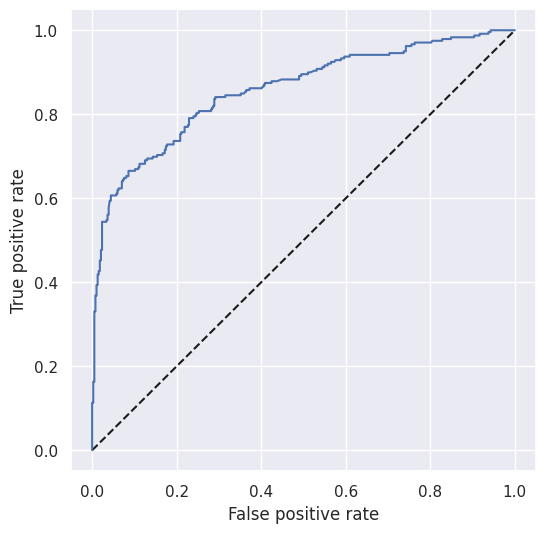

-------------
[model]:  KNeighborsClassifier()
[params]:  {'n_neighbors': [2, 3, 5, 10, 20], 'leaf_size': [10, 20, 30], 'p': [1, 2, 3], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=48,
                   param_distributions={'leaf_size': [10, 20, 30],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [2, 3, 5, 10, 20],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=2023, scoring='precision')
Best params:  {'weights': 'uniform', 'p': 2, 'n_neighbors': 2, 'metric': 'minkowski', 'leaf_size': 30}
Best score: [precision]: 0.8480589186471539
AUC = 0.9704497907949792
len(dictResults):  3


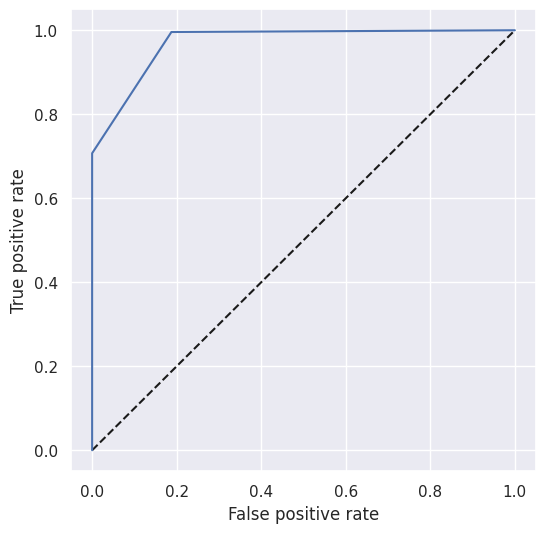

-------------
[model]:  DecisionTreeClassifier()
[params]:  {'criterion': ['gini', 'entropy'], 'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f96db60cd10>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db72cc10>}


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedM

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=48,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f96db60cd10>,
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db72cc10>},
                   random_state=2023, scoring='precision')
Best params:  {'ccp_alpha': 0.014883378802375117, 'criterion': 'entropy', 'max_depth': 99}
Best score: [precision]: 0.8217588932806323
AUC = 0.8822404550209204
len(dictResults):  4


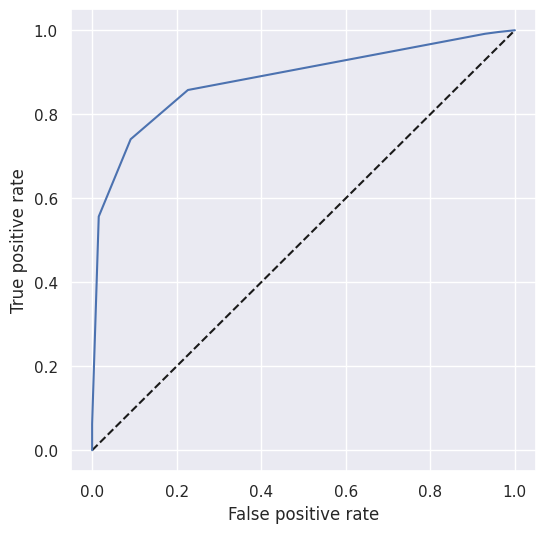

-------------
[model]:  ExtraTreesClassifier()
[params]:  {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96dba323d0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db838210>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96dbb89350>, 'max_features': ['sqrt', 'log2']}
RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=48,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96dbb89350>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db838

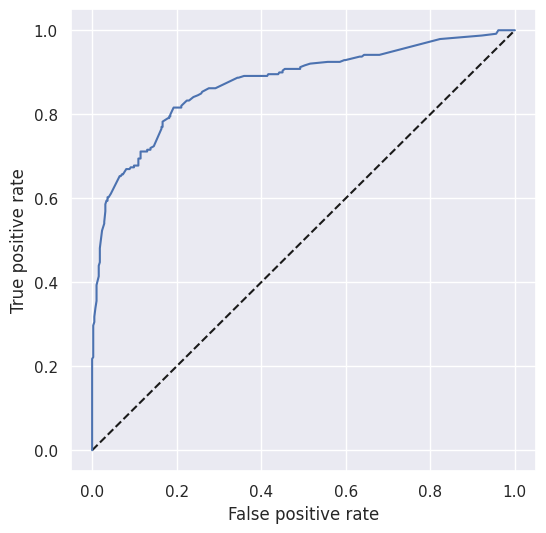

-------------
[model]:  RandomForestClassifier()
[params]:  {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96e03126d0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db687fd0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96dba12f10>, 'max_features': ['sqrt', 'log2']}
RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=48,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96dba12f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96d

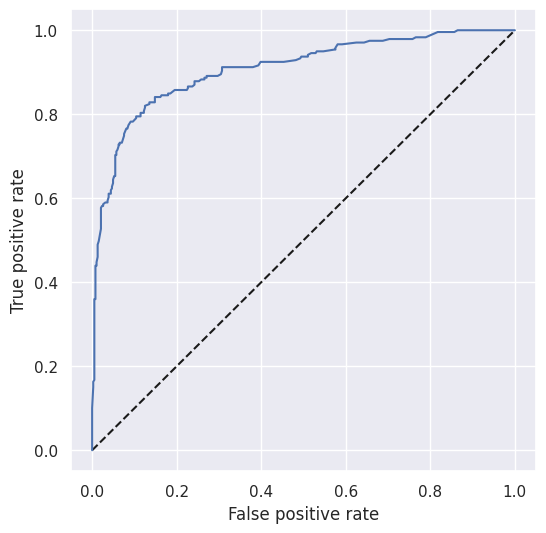

-------------
[model]:  BaggingClassifier()
[params]:  {'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db7bafd0>}
RandomizedSearchCV(cv=5, estimator=BaggingClassifier(), n_iter=48,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96db7bafd0>},
                   random_state=2023, scoring='precision')
Best params:  {'n_estimators': 2}
Best score: [precision]: 0.8140037377803335
AUC = 0.9652632496513249
len(dictResults):  7


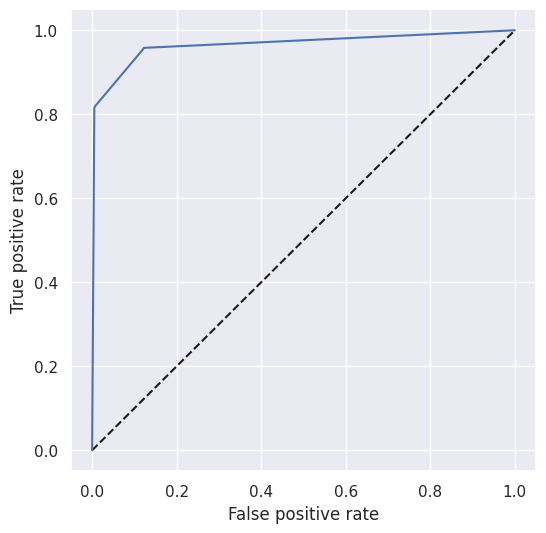

--[plot_multi_roc_curve]--
[key]:  dummy
[key]:  log
[key]:  knn
[key]:  decisionTree
[key]:  extraTree
[key]:  randomForest
[key]:  baggingClassifier


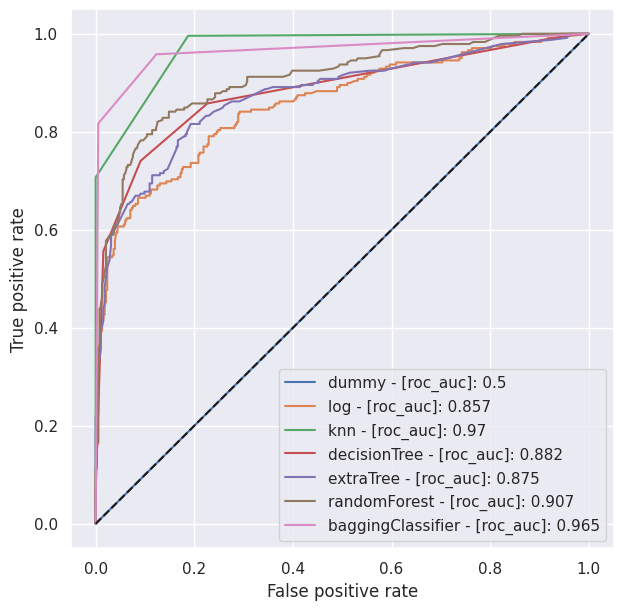

--[plot_multi_precision_recall--
[key]:  dummy
[key]:  log
[key]:  knn
[key]:  decisionTree
[key]:  extraTree
[key]:  randomForest
[key]:  baggingClassifier


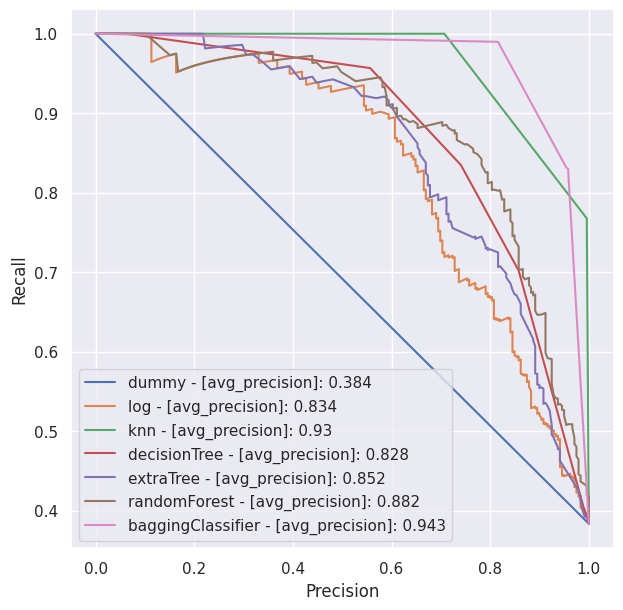

In [47]:


## baseline - dummy
dummy_c = DummyClassifier()

## logistc regression
log_r = LogisticRegression(solver='saga'
, max_iter= 10^200
#, penalty='elasticnet'
, random_state=2023)

## knn
model_knn = KNeighborsClassifier()

## decision tree
model_decision_tree = DecisionTreeClassifier()

## extra tree
model_extra_tree = ExtraTreesClassifier()

## random forest
model_random_forest = RandomForestClassifier()

### obs: fazer aggingClassifer(estimator = <decision_tree>.best_estimator_)
##bagging
model_bagging = BaggingClassifier()

##
params_dummy = {'strategy' : ['most_frequent', 'prior']}

##
params_log = {
  #'C' :[0, 0.01, 0.07, 0.1, 0.2 ,0.5, 0.7 , 1, 10, 100]
  'C' :loguniform(1e-5, 1e3)
, 'l1_ratio': [0, 0.05, 0.1, 0.5, 1]
#, 'penalty': ['l1', 'l2', 'elasticnet', 'none']
#, 'penalty': ['l1', 'l2', 'elasticnet']
, 'penalty': ['elasticnet']
}

## knn
params_knn = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
, 'metric': ['minkowski', 'euclidean', 'manhattan']
, 'weights' : ['uniform', 'distance']
  }

## decision tree
params_decision_tree = { 
  'criterion': ['gini', 'entropy']
  , 'ccp_alpha': loguniform(1e-3, 1e3)
  , 'max_depth': randint(2, 128)

}

## extra_tree
params_extra_tree = { 
  'criterion' : ['gini', 'entropy', 'log_loss']  
  , 'n_estimators': randint(1, 10^3)
  , 'min_samples_split' : randint(2, 10^5)
  , 'min_samples_leaf' : randint(1, 10^5)
  , 'max_features': ['sqrt', 'log2']

}



## random forest
params_random_forest = {
  'criterion' : ['gini', 'entropy', 'log_loss']  
  , 'n_estimators': randint(1, 10^3)
  , 'min_samples_split' : randint(2, 10^5)
  , 'min_samples_leaf' : randint(1, 10^5)
  , 'max_features': ['sqrt', 'log2']

}

## bagging
params_bagging = {
  'n_estimators': randint(1, 10^3)
}

## dictionary containing models
dictModels = {}


dictModels.update({'dummy':{'model': dummy_c, 'params': params_dummy}})
dictModels.update({'log':{'model':log_r, 'params':params_log}})
dictModels.update({'knn': {'model':model_knn, 'params': params_knn}})
dictModels.update({'decisionTree': {'model': model_decision_tree, 'params': params_decision_tree}})
dictModels.update({'extraTree': {'model': model_extra_tree, 'params': params_extra_tree}})
dictModels.update({'randomForest': {'model': model_random_forest, 'params': params_random_forest}})
dictModels.update({'baggingClassifier': {'model': model_bagging, 'params': params_bagging}})

lstKeysInnerDict=['model', 'params']

dictResults = {}

results = {}
lstCols = ['train', 'pred']
dfResultTrainPred = pd.DataFrame(columns = lstCols )

### scoring
#scoringMethod='roc_auc'
scoringMethod='precision'

for key in dictModels.keys():
    #print("key: ", key)
    #print("value: ", dictModels.get(key))
    innerDict = dictModels.get(key)
    print ('-------------')
    model = innerDict.get('model')
    params = innerDict.get('params')
    print('[model]: ', model)
    print('[params]: ', params)

    #### randomized search
    #hyper_p_search = RandomizedSearchCV(model, params, cv=5, scoring=scoringMethod, n_iter = 5*10^2, random_state=2023)
    hyper_p_search = RandomizedSearchCV(model, params, cv=5, scoring=scoringMethod, n_iter = 5*10^2, random_state=2023)
    print(hyper_p_search.fit(X_train, y_train))
    print("Best params: ", hyper_p_search.best_params_)
    print("Best score: ["+scoringMethod+"]:",  hyper_p_search.best_score_)
    
    y_train_pred = hyper_p_search.best_estimator_.predict_proba(X_train)[:, 1]
    curr_roc_auc_score = roc_auc_score(y_train, y_train_pred)
    

    print(f'AUC = {curr_roc_auc_score}')
    

    #print('type(train): ', type(y_train))
    #print('type(train_pred): ', type(y_train_pred))

    #print("train.head(): ", y_train.head())
    #print("train.to_numpy(): ", y_train.to_numpy())

    dictResults.update({key: {'y_actual': y_train, 'y_pred':y_train_pred, 'roc_auc_score':curr_roc_auc_score }})
    print("len(dictResults): ", len(dictResults))
    #results[type(model)] = y_train_pred

    plot_roc_curve(y_train, y_train_pred, pLabel = type(model))
    

    

plot_multi_roc_curve(dictResults)
plot_multi_precision_recall(dictResults)





#### Vérification du meilleur score

In [19]:
## 5  best_estimator, best_params
## 6 score cross_val
model = LogisticRegression(penalty='l2', C=0.5, l1_ratio=[0, 0.5, 1.0])
model.fit(X_train, y_train)


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(C=0.5, l1_ratio=[0, 0.5, 1.0])

#### Aire sous la courbe

In [24]:
y_train_pred_proba = grid_search.predict_proba(X_train)[:, 1]
print('AUC = ',  roc_auc_score(y_train, y_train_pred_proba))

AUC =  0.8664465655509065


#### Courbe ROC

### 2-2 - K plus proches voisins

[class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model_knn = KNeighborsClassifier(n_neighbors = 5, weights ='uniform', algorithm = 'auto'
, leaf_size=30, p=2)

In [27]:
param_grid = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
, 'metric': ['minkowski', 'euclidean', 'manhattan']  }
grid_search = GridSearchCV(model_knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best parameters: ", grid_search.best_score_)

Best parameters:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 1}
Best parameters:  0.8693047824469297


#### Aire sous la courbe

In [28]:
y_train_pred_proba = grid_search.predict_proba(X_train)[:, 1]
print('AUC = ',  roc_auc_score(y_train, y_train_pred_proba))

AUC =  0.9029975156903766


#### Courbe ROC

## Exercice 3 - Recherche aléatoire

### 3-1 - Arbres de décision

[class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [53]:
## gabarito
from sklearn.utils.fixes import loguniform
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [54]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
param_grid = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
, 'metric': ['minkowski', 'euclidean', 'manhattan']  }
grid_search = GridSearchCV(model_knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best parameters: ", grid_search.best_score_)

NameError: name 'GridSearchCV' is not defined

#### Aire sous la courbe

#### Courbe ROC

### 3-2 - Bagging

[class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In [11]:
distributions = dict(
    n_estimators = randint(2, 500)

)

model = BaggingClassifer(estimator)

#### Aire sous la courbe

#### Courbe ROC

## Exercice 4 - Hyperopt avec Forêts aléatoires et gradient boosting

In [55]:
from hpsklearn import HyperoptEstimator

### 4-1 - Gradient boosting

#### Définition de l'hyperespace

In [56]:
from hyperopt import hp, fmin

In [62]:
hyperspace = {
'n_estimators': 1 + hp.randint('n_estimators', 500)
, 'learning_rate': hp.loguniform('learning_rate', -8.0, 1.0)
, 'max_depth' : 1 + hp.randint('max_depth', 100)
, 'loss': hp.choice('loss', ['log_loss', 'exponential'])
, 'max_features': hp.choice('max_features',['sqrt', 'log2'])
, 'ccp_alpha': hp.loguniform('ccp_alpha', -6, 2)
}

#### Fonction objective

In [58]:
from sklearn.model_selection import cross_val_score

In [63]:
def f_objective(hyperspace):    
    # Instacier gb avec les hyperparam
    gb = GradientBoostingClassifier(n_estimators= hyperspace['n_estimators']
    , learning_rate = hyperspace['learning_rate']
    , max_depth= hyperspace['max_depth'] 
    , loss = hyperspace['loss']
    , max_features = hyperspace['max_features']
    , ccp_alpha = hyperspace['ccp_alpha']
    
    
    )
    
    # fit
    gb.fit(X_train, y_train)
    
    score = cross_val_score(gb, X_train, y_train,  cv=5, scoring='roc_auc').mean()
    
    

    # return score (peut-être rajouter signe moins)
    return -score

#### Lancement de l'optimisation

In [64]:
from hyperopt import hp, fmin, tpe

In [65]:

best = fmin(f_objective, hyperspace, algo=tpe.suggest, max_evals=100)

100%|██████████| 100/100 [05:29<00:00,  3.29s/trial, best loss: -0.8733688821909708]


In [66]:
best

{'ccp_alpha': 0.0057697941489906375,
 'learning_rate': 0.0006878692217391792,
 'loss': 1,
 'max_depth': 47,
 'max_features': 0,
 'n_estimators': 426}

#### Meilleurs paramètres

In [68]:
### copier l'output du 'best' ici
modele_finale = GradientBoostingClassifier(ccp_alpha= 0.0057697941489906375,
 learning_rate= 0.0006878692217391792,
 loss = 1,
 max_depth= 47,
 max_features = 0,
 n_estimators = 426
)


#### Réentraînement du gradient boosting avec les meilleurs hyperparamètres


In [70]:
modele_finale.fit(X_train, y_train)

ValueError: Loss 1 not supported. 

#### Aire sous la courbe

#### Courbe ROC

### 4-2 - Gradient boosting et forêts aléatoires (optionnel)

## Exercice 5 - Performances sur le jeu de tests

#### Aire sous la courbe

#### Courbe ROC

In [2]:
import sys
#!{sys.executable} -m pip install hyperopt
!{sys.executable} -m pip install hpsklearn
from hyperopt import hp

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 766.8 kB/s eta 0:00:00m eta 0:00:010:01
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23913 sha256=cc72cd87416d8cde015bce2a85cbf6f8fbe0de887fbe9f88e7e811c1b5282f4b
  Stored in directory: /home/hadoop/.cache/pip/wheels/51/65/fa/5cff9834f5977f582cfcc5a7971610b75e1a8cffc49aa45567
Successfully built hpsklearn
